<a href="https://colab.research.google.com/github/aalsurabi/smart-data-analytics/blob/main/HDMA_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDMA Excersise 1

## Structure



1.   Import libraries and data
2.   Data Exploration
3.   Fix errors, NA-Values, Scewness, etc.

## 1. Import librariers and data

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, chi2_contingency
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


from google.colab import drive
drive.mount('/content/drive')
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSDA/Project 1/hdma_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSDA/Project 1/hdma_test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Data Exploration

In [104]:
num_rows, num_columns = train_data.shape
print("Number of rows: ", num_rows)
print("Number of columns: ", num_columns)
train_data.head()

Number of rows:  2281
Number of columns:  14


,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condo,black,deny
0,0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,False
1,1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,False
2,2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,False
3,3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,False
4,4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,False


In [105]:
num_rows, num_columns = test_data.shape
print("Number of rows: ", num_rows)
print("Number of columns: ", num_columns)
test_data.head()

Number of rows:  100
Number of columns:  13


,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condo,black
0,12,0.280,0.270,0.537634,1.0,2.0,no,yes,no,no,4.3,0,no
1,63,0.279,0.208,0.751880,1.0,2.0,no,no,no,no,5.3,0,no
2,72,0.280,0.280,0.738255,1.0,2.0,no,no,no,yes,3.2,0,no
3,78,0.265,0.265,0.835165,2.0,2.0,yes,yes,no,no,4.3,0,no
4,82,0.310,0.310,0.882353,4.0,2.0,no,no,no,no,3.2,0,yes


## 2.1 Check for missing values and data types



In [106]:
print("\nData types and null counts:")
summary = pd.DataFrame({
    'Data Type': train_data.dtypes,
    'Null Count': train_data.isnull().sum()
})
print(summary)
print()
rows_with_missing_values = train_data[train_data.isnull().any(axis=1)]

print("Rows with missing values:")
print(rows_with_missing_values)


Data types and null counts:
           Data Type  Null Count
Unnamed: 0     int64           0
dir          float64           0
hir          float64           0
lvr          float64           0
ccs          float64           0
mcs          float64           0
pbcr          object           1
dmi           object           0
self          object           1
single        object           0
uria         float64           0
condo          int64           0
black         object           0
deny            bool           0

Rows with missing values:
      Unnamed: 0       dir       hir       lvr       ccs       mcs pbcr dmi  \
2280        2380  0.330814  0.255346  0.700783  2.116387  1.721008  NaN  no   

     self single      uria  condo black   deny  
2280  NaN    yes  3.774496      0    no  False  


In [107]:
print("\nData types and null counts:")
summary = pd.DataFrame({
    'Data Type': test_data.dtypes,
    'Null Count': test_data.isnull().sum()
})
print(summary)


Data types and null counts:
           Data Type  Null Count
Unnamed: 0     int64           0
dir          float64           0
hir          float64           0
lvr          float64           0
ccs          float64           0
mcs          float64           0
pbcr          object           0
dmi           object           0
self          object           0
single        object           0
uria         float64           0
condo          int64           0
black         object           0


Since it's only one observation in the train set with missing values, we're going to remove that observation

In [108]:
train_data = train_data.dropna()

### Data types

According to the meta data, the variables pbcr, dmi, self, single, condo and black are all "Yes-or-No-Questions" so they should all be boolean. Let's look at them closer

In [109]:
boolean_vars = ['pbcr', 'dmi', 'self', 'single', 'condo', 'black']

# Function to print unique values and counts for each boolean variable
def print_boolean_stats(df, var_list):
    for var in var_list:
        print(f"Statistics for variable '{var}':")
        unique_values = df[var].value_counts()
        print(unique_values)
        print()

print_boolean_stats(train_data, boolean_vars)

Statistics for variable 'pbcr':
pbcr
no     2120
yes     160
Name: count, dtype: int64

Statistics for variable 'dmi':
dmi
no     2243
yes      37
Name: count, dtype: int64

Statistics for variable 'self':
self
no     2011
yes     269
Name: count, dtype: int64

Statistics for variable 'single':
single
no     1387
yes     893
Name: count, dtype: int64

Statistics for variable 'condo':
condo
0    1633
1     647
Name: count, dtype: int64

Statistics for variable 'black':
black
no     1967
yes     313
Name: count, dtype: int64



We're going to transform all of them to Boolean as integer

In [110]:
# remove condo, because it's already binary
boolean_vars = ['pbcr', 'dmi', 'self', 'single', 'black']

# Transform "Yes" to 1 and "No" to 0 for the specified variables
train_data[boolean_vars] = train_data[boolean_vars].replace({'yes': 1, 'no': 0})
test_data[boolean_vars] = test_data[boolean_vars].replace({'yes': 1, 'no': 0})

# Ensure they're of integer type
train_data[boolean_vars] = train_data[boolean_vars].astype(int)
test_data[boolean_vars] = test_data[boolean_vars].astype(int)

# Put condo back to the array
boolean_vars.append("condo")

<ipython-input-110-56b09c5e3219>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[boolean_vars] = train_data[boolean_vars].replace({'yes': 1, 'no': 0})
<ipython-input-110-56b09c5e3219>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[boolean_vars] = train_data[boolean_vars].astype(int)


## 2.2 Data Distribution and Correlation of explaining variables

From now on we're only going to look at the train_data, since we consider the train_data as not available

### 2.2.1 Categorical Features

> Add blockquote



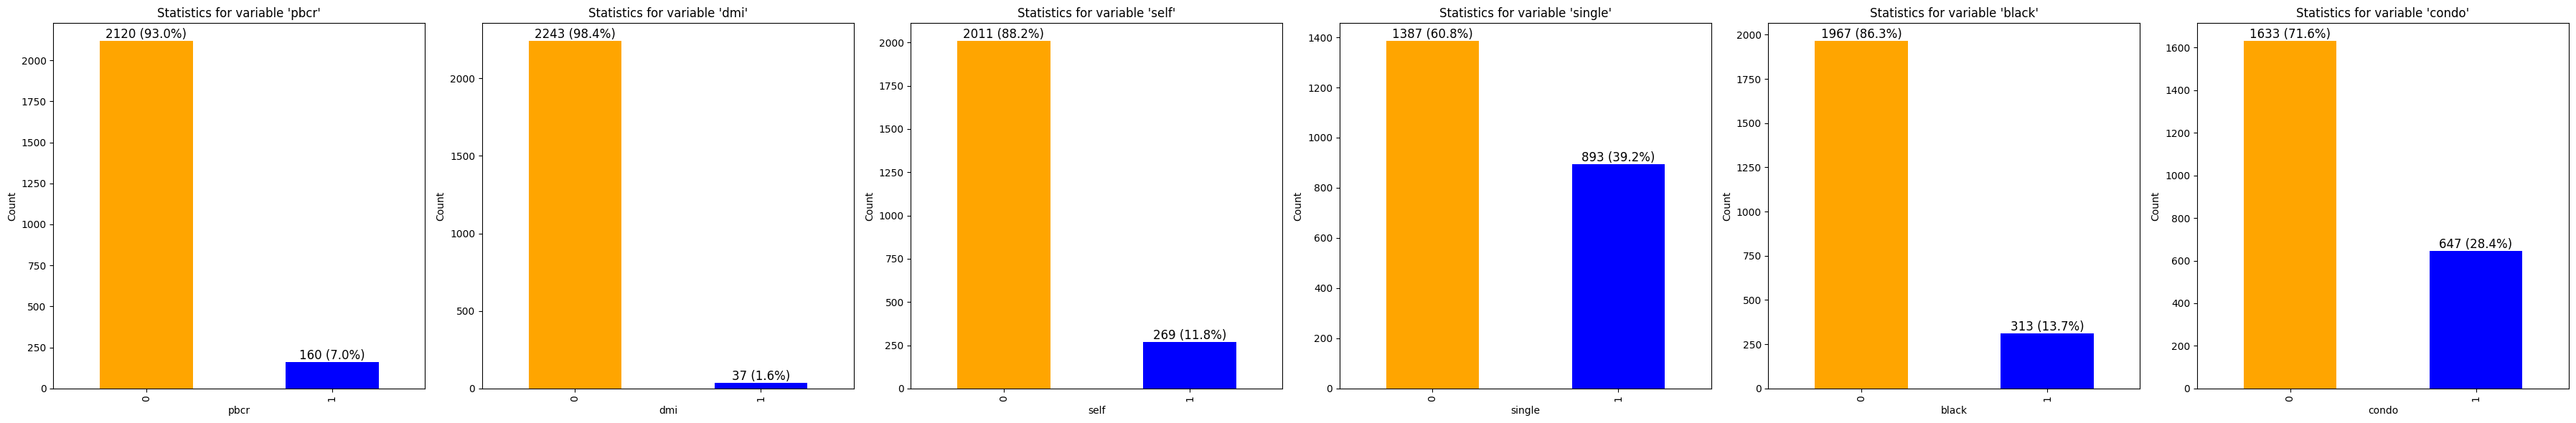

In [111]:
# Function to plot unique values and counts for each boolean variable
def plot_boolean_stats(df, var_list):
    num_vars = len(var_list)
    fig, axes = plt.subplots(nrows=1, ncols=num_vars, figsize=(num_vars * 6, 6))

    for i, var in enumerate(var_list):
        ax = axes[i] if num_vars > 1 else axes
        unique_values = df[var].value_counts()
        total_count = unique_values.sum()
        percentages = unique_values / total_count * 100
        unique_values.plot(kind='bar', ax=ax, color=['orange', 'blue'])

        ax.set_title(f"Statistics for variable '{var}'")
        ax.set_xlabel(var)
        ax.set_ylabel('Count')

        # Add percentage annotations inside the bars
        for j, count in enumerate(unique_values):
            ax.text(j, count, f"{count} ({percentages[j]:.1f}%)", ha='center', va='bottom', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()

# Print stats for specified boolean variables
plot_boolean_stats(train_data, boolean_vars)

### 2.2.2 Numerical Features

In [112]:
# List of numerical variables
numerical_vars = ["dir", "hir", "lvr", "ccs", "mcs", "uria"]

# Summary statistics
summary = train_data[numerical_vars].describe()

# Additional statistics
modes = train_data[numerical_vars].mode()
medians = train_data[numerical_vars].median()

print("Summary statistics:")
print(summary)

print("\nMode:")
print(modes)

print("\nMedian:")
print(medians)

Summary statistics:
               dir          hir          lvr          ccs          mcs  \
count  2280.000000  2280.000000  2280.000000  2280.000000  2280.000000   
mean      0.328167     0.253334     0.735877     2.099561     1.716667   
std       0.084720     0.073506     0.176539     1.656082     0.540167   
min       0.000000     0.000000     0.020000     1.000000     1.000000   
25%       0.280000     0.215000     0.651731     1.000000     1.000000   
50%       0.330000     0.260000     0.779167     1.000000     2.000000   
75%       0.370000     0.297000     0.864995     2.000000     2.000000   
max       1.280000     0.730000     1.908333     6.000000     4.000000   

              uria  
count  2280.000000  
mean      3.776754  
std       2.022399  
min       1.800000  
25%       3.100000  
50%       3.200000  
75%       3.900000  
max      10.600000  

Mode:
    dir   hir  lvr  ccs  mcs  uria
0  0.36  0.28  0.8  1.0  2.0   3.2

Median:
dir     0.330000
hir     0.260000
lvr 

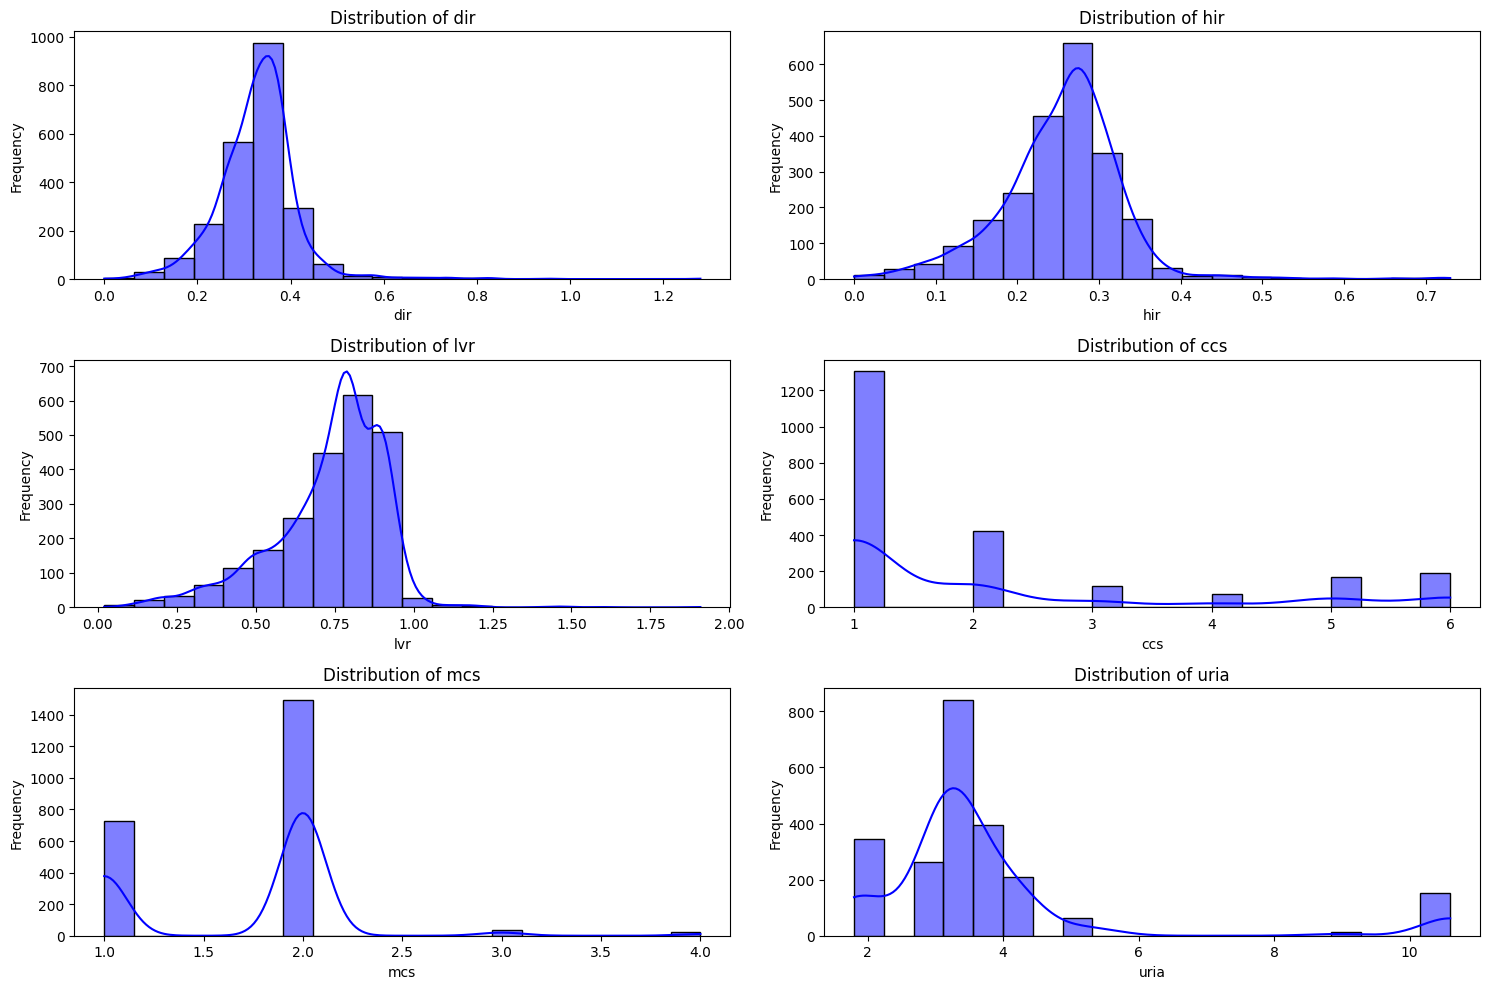

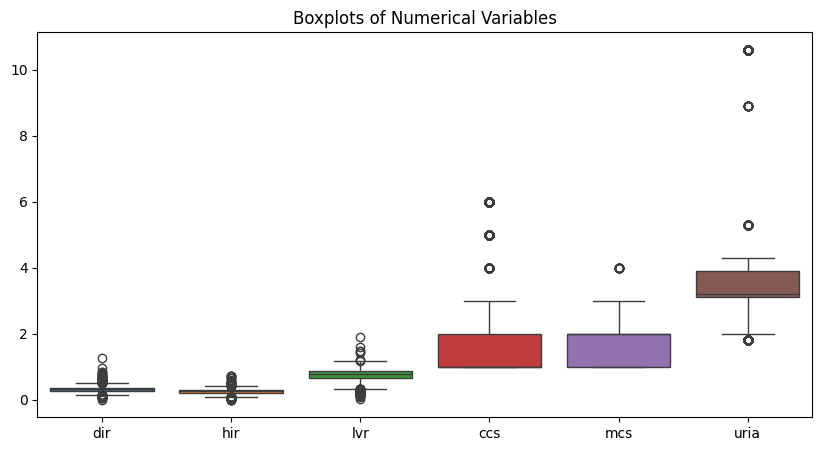

In [113]:
# Visualization: Histograms and boxplots
plt.figure(figsize=(15, 10))

# Histograms
for i, var in enumerate(numerical_vars, start=1):
    plt.subplot(3, 2, i)  # Adjust layout as necessary
    sns.histplot(train_data[var], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")

# Displaying histograms
plt.tight_layout()
plt.show()

# Boxplot for an overview of all variables
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_data[numerical_vars])

plt.title("Boxplots of Numerical Variables")
plt.show()

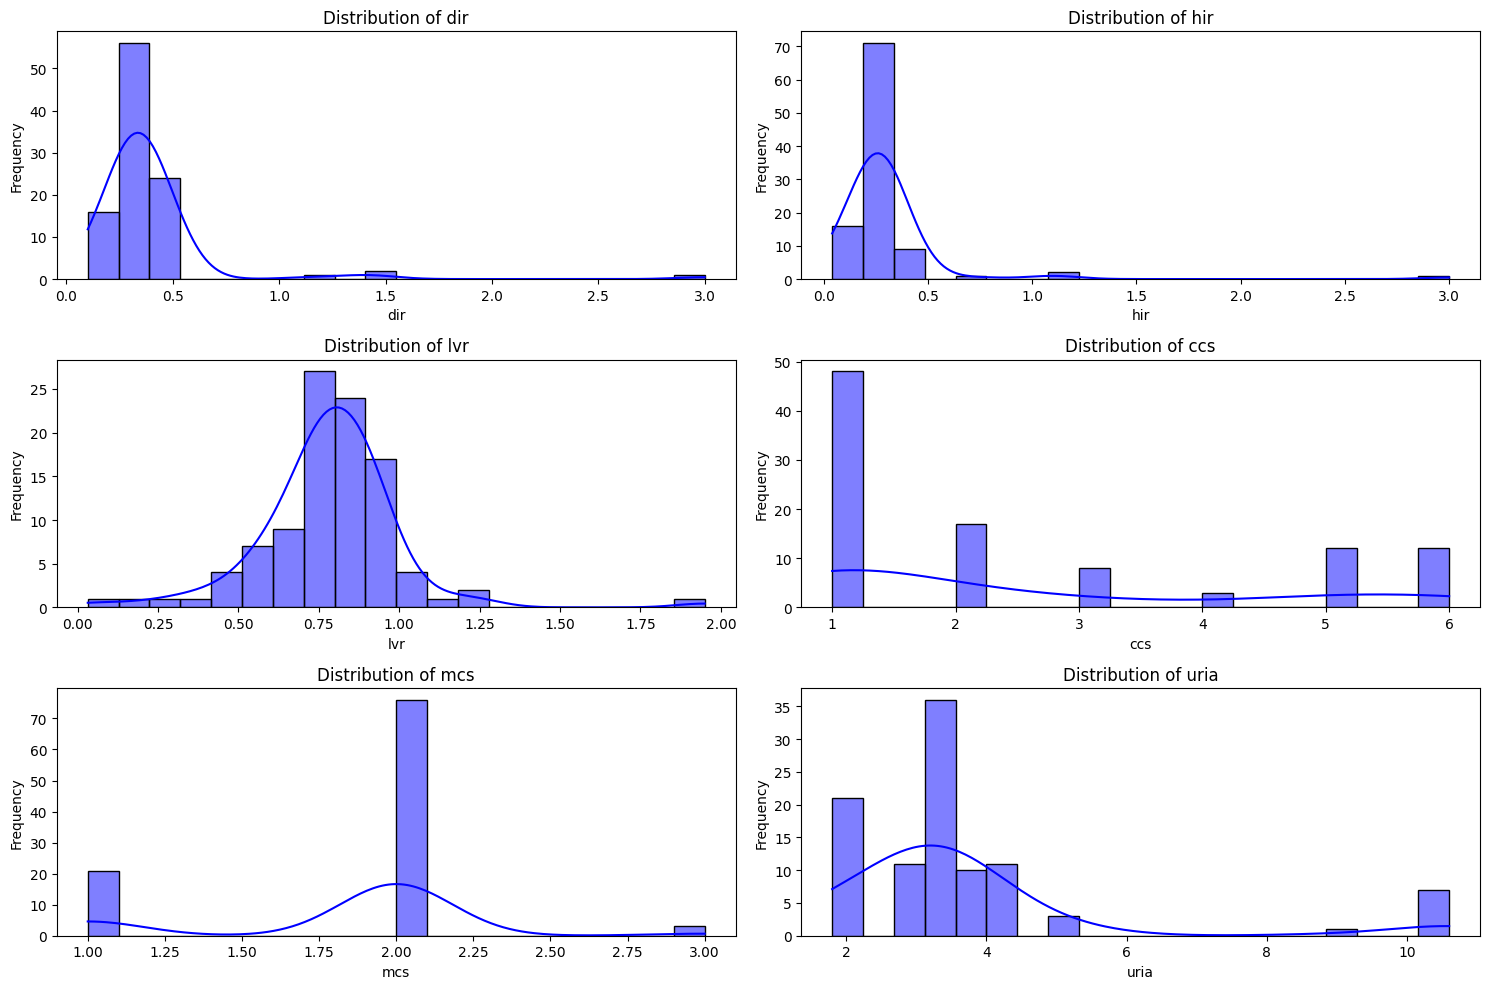

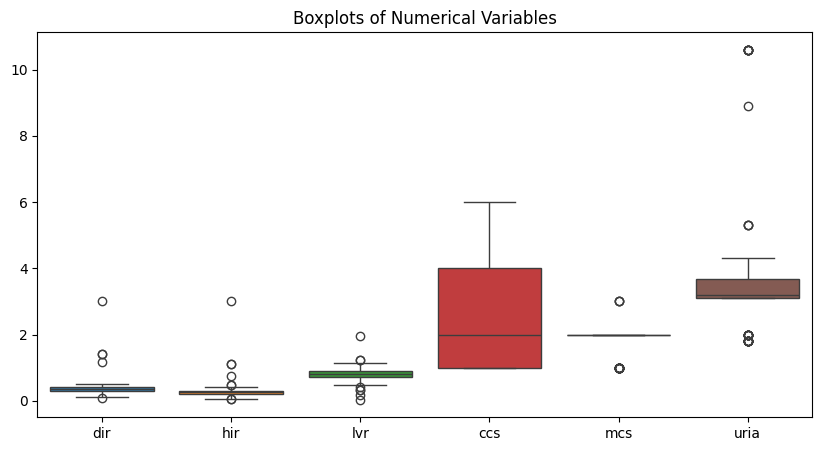

In [114]:
# Visualization: Histograms and boxplots
plt.figure(figsize=(15, 10))

# Histograms
for i, var in enumerate(numerical_vars, start=1):
    plt.subplot(3, 2, i)  # Adjust layout as necessary
    sns.histplot(test_data[var], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")

# Displaying histograms
plt.tight_layout()
plt.show()

# Boxplot for an overview of all variables
plt.figure(figsize=(10, 5))
sns.boxplot(data=test_data[numerical_vars])

plt.title("Boxplots of Numerical Variables")
plt.show()

Ideas: Transform dir, hir, lvr.\
Problem: Also high outliers in test-set. Propably shouldn't remove them in trainset

### 2.2.3 Correlation



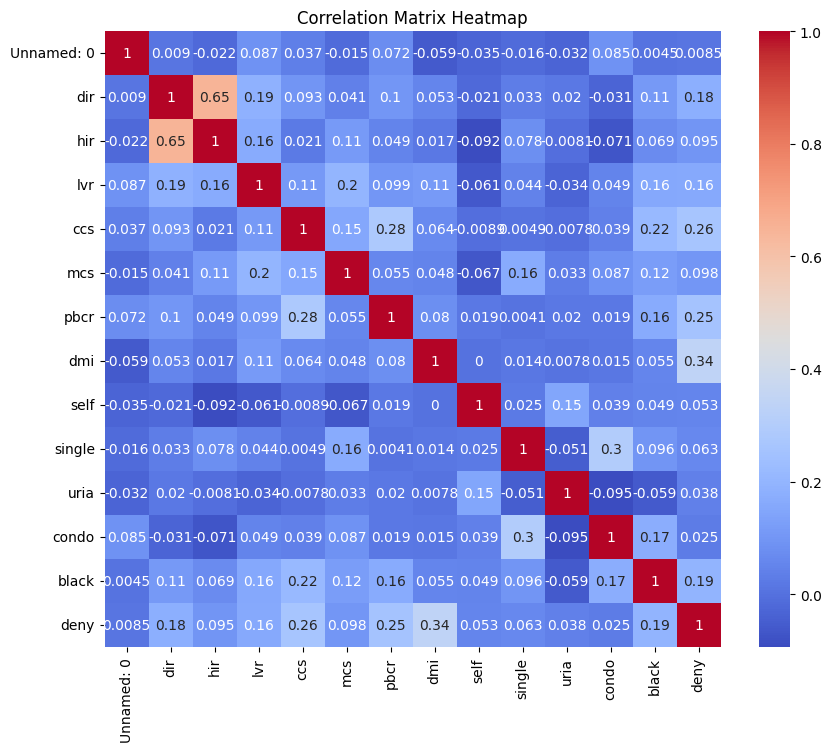

In [115]:
numerical_vars = ["dir", "hir", "lvr", "ccs", "mcs", "uria"]
boolean_vars = ['pbcr', 'dmi', 'self', 'single', 'condo', 'black']

# Function to compute correlations
def compute_correlations(df):
    numerical_vars = [col for col in df.columns if df[col].dtype in [np.float64, np.int64]]
    binary_vars = [col for col in df.columns if len(df[col].unique()) == 2]

    corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

    for num1 in numerical_vars:
        for num2 in numerical_vars:
            if num1 != num2:
                corr_matrix.loc[num1, num2] = df[num1].corr(df[num2])

        for bin1 in binary_vars:
            correlation, _ = pointbiserialr(df[num1], df[bin1])
            corr_matrix.loc[num1, bin1] = correlation
            corr_matrix.loc[bin1, num1] = correlation

    for bin1 in binary_vars:
        for bin2 in binary_vars:
            if bin1 != bin2:
                cont_table = pd.crosstab(df[bin1], df[bin2])
                chi2_stat, _, _, _ = chi2_contingency(cont_table)
                phi_coefficient = np.sqrt(chi2_stat / df.shape[0])
                corr_matrix.loc[bin1, bin2] = phi_coefficient

    return corr_matrix

# Generate the correlation matrix
correlation_matrix = compute_correlations(train_data)

# Fill NaN values with 0 or a sensible default for display
correlation_matrix = correlation_matrix.apply(pd.to_numeric, errors='coerce').fillna(1)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

## 2.3 Bivariate Statistics in combination with goal variable "deny"

# 3 Training and Evaluation of best model

In [98]:
# Features and target variable
numerical_vars = ["dir", "hir", "lvr", "ccs", "mcs", "uria"]
boolean_vars = ['pbcr', 'dmi', 'self', 'single', 'condo', 'black']

features = numerical_vars + boolean_vars
X = train_data[features]
y = train_data['deny']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 3.1 Random Forest

In [ ]:
# Create a pipeline to normalize numerical features and then train the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize numerical variables
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest model
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 8, 10],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [4, 6]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model and its performance
best_rf = grid_search.best_estimator_

# Save the pipeline to a file for future use
joblib.dump(best_rf, 'best_rf_pipeline.pkl')

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
print("Best Hyperparameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

##3.2 Logistic regression

In [99]:
# Create a pipeline for logistic regression
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize numerical variables
    ('logistic', LogisticRegression(random_state=42))  # Logistic Regression model
])

# Hyperparameter tuning using GridSearchCV
logistic_param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
}

grid_search_logistic = GridSearchCV(logistic_pipeline, logistic_param_grid, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train, y_train)

# Best model and its performance
best_logistic = grid_search_logistic.best_estimator_

# Save the pipeline to a file for future use
joblib.dump(best_logistic, 'best_logistic_pipeline.pkl')

# Predictions
y_pred_logistic = best_logistic.predict(X_test)

# Evaluation
print("Best Hyperparameters:", grid_search_logistic.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

Best Hyperparameters: {'logistic__C': 0.1}

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.99      0.96       515
        True       0.80      0.29      0.43        55

    accuracy                           0.92       570
   macro avg       0.86      0.64      0.69       570
weighted avg       0.92      0.92      0.91       570


Confusion Matrix:
 [[511   4]
 [ 39  16]]
Accuracy: 0.9245614035087719


##3.3 XGBoost

In [100]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Create a pipeline for XGBoost
xgb_pipeline = xgb.XGBClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

# Best model and its performance
best_xgb = grid_search_xgb.best_estimator_

# Save the pipeline to a file for future use
joblib.dump(best_xgb, 'best_xgb_pipeline.pkl')

# Predictions
y_pred_xgb = best_xgb.predict(X_test)

# Evaluation
print("Best Hyperparameters:", grid_search_xgb.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.98      0.96       515
        True       0.72      0.47      0.57        55

    accuracy                           0.93       570
   macro avg       0.83      0.73      0.77       570
weighted avg       0.92      0.93      0.93       570


Confusion Matrix:
 [[505  10]
 [ 29  26]]
Accuracy: 0.9315789473684211


## 3.4 Neurol Network

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predictions
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))
print("Accuracy:", accuracy_score(y_test, y_pred_nn))

Epoch 1/10
43/43 [==============================] - 1s 9ms/step - loss: 0.4185 - accuracy: 0.8501 - val_loss: 0.3533 - val_accuracy: 0.8977
Epoch 2/10
43/43 [==============================] - 0s 4ms/step - loss: 0.3426 - accuracy: 0.8940 - val_loss: 0.3347 - val_accuracy: 0.8977
Epoch 3/10
43/43 [==============================] - 0s 4ms/step - loss: 0.3313 - accuracy: 0.8940 - val_loss: 0.3212 - val_accuracy: 0.8977
Epoch 4/10
43/43 [==============================] - 0s 3ms/step - loss: 0.3199 - accuracy: 0.8947 - val_loss: 0.3119 - val_accuracy: 0.8977
Epoch 5/10
43/43 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.8955 - val_loss: 0.3032 - val_accuracy: 0.9035
Epoch 6/10
43/43 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.9006 - val_loss: 0.3071 - val_accuracy: 0.9035
Epoch 7/10
43/43 [==============================] - 0s 3ms/step - loss: 0.2938 - accuracy: 0.9006 - val_loss: 0.3034 - val_accuracy: 0.9035
Epoch 8/10
43/43 [==

In [102]:
#4 Final Training and Prediction

In [116]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Features and target variable
numerical_vars = ["dir", "hir", "lvr", "ccs", "mcs", "uria"]
boolean_vars = ['pbcr', 'dmi', 'self', 'single', 'condo', 'black']

features = numerical_vars + boolean_vars
X_train = train_data[features]
y_train = train_data['deny']

# Create a pipeline for XGBoost
xgb_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'subsample': 0.8
}

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize numerical variables
    ('xgb', xgb.XGBClassifier(**xgb_params))  # XGBoost model
])

# Train the XGBoost model
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [120]:
X_train.head()

,dir,hir,lvr,ccs,mcs,uria,pbcr,dmi,self,single,condo,black
0,0.221,0.221,0.800000,5.0,2.0,3.9,0,0,0,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,3.2,0,0,0,1,0,0
2,0.372,0.248,0.920398,1.0,2.0,3.2,0,0,0,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,4.3,0,0,0,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,3.2,0,0,0,0,0,0


In [119]:
X_test_data.head()

,dir,hir,lvr,ccs,mcs,uria,pbcr,dmi,self,single,condo,black
0,0.280,0.270,0.537634,1.0,2.0,4.3,0,1,0,0,0,0
1,0.279,0.208,0.751880,1.0,2.0,5.3,0,0,0,0,0,0
2,0.280,0.280,0.738255,1.0,2.0,3.2,0,0,0,1,0,0
3,0.265,0.265,0.835165,2.0,2.0,4.3,1,1,0,0,0,0
4,0.310,0.310,0.882353,4.0,2.0,3.2,0,0,0,0,0,1


In [121]:
# Features for prediction
X_test_data = test_data[features]

# Normalize the numerical features using the same StandardScaler from the pipeline
X_test_data = xgb_pipeline.named_steps['scaler'].transform(X_test_data)

# Make predictions on the test data
y_pred_test = xgb_pipeline.predict(X_test_data)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [131]:
ids = test_data.iloc[:, 0]  # Extract IDs

# Convert integer predictions to boolean (True/False)
y_pred_test_bool = y_pred_test.astype(bool)

# Combine IDs and predictions into a new DataFrame
results = pd.DataFrame({
    'id': ids,
    'Expected': y_pred_test_bool
})

# Save results to a CSV file
from google.colab import files
results.to_csv('test_set_predictions.csv', index=False)
files.download('test_set_predictions.csv')

print("Predictions saved to 'test_set_predictions.csv'.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predictions saved to 'test_set_predictions.csv'.
